# Домашнее задание "Продвинутая оптимизация".

## Задание

При фиксированном `seed=42` поэкспериментируйте с параметрами алгоритма [differential_evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html): strategy, popsize, mutation.

Постройте графики количества итераций (`nit`) оптимизации [функции ackley](https://en.wikipedia.org/wiki/Ackley_function) от значения параметра.

Подробнее о результате выдачи [тут](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html).

In [1]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

 message: Optimization terminated successfully.
 success: True
     fun: 4.440892098500626e-16
       x: [ 0.000e+00  0.000e+00]
     nit: 90
    nfev: 2793

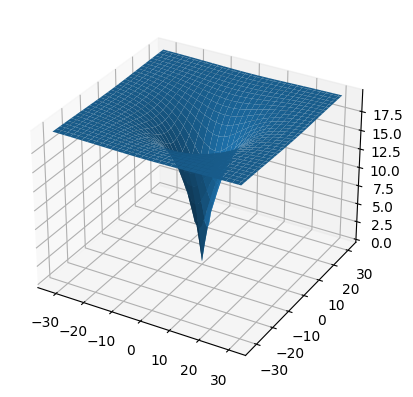

In [3]:
from numpy import meshgrid

x = np.arange(-32, 32, 1)
y = np.arange(-32, 32, 1)
x, y = meshgrid(x, y)
result = ackley([x, y])

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_surface(x, y, result)
plt.show()

### strategy

In [4]:
strategies_dict = {}
strategies_list = ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp',
                   'best2exp', 'rand2exp', 'randtobest1bin', 'best2bin',
                   'rand2bin', 'rand1bin']

for strategy in strategies_list:
  res = differential_evolution(ackley, bounds, seed=42, strategy=strategy)
  strategies_dict[strategy] = res.nit
  print(f'strategy: {strategy}\n{res}\n')

strategy: best1bin
 message: Optimization terminated successfully.
 success: True
     fun: 4.440892098500626e-16
       x: [ 0.000e+00  0.000e+00]
     nit: 90
    nfev: 2793

strategy: best1exp
 message: Optimization terminated successfully.
 success: True
     fun: 4.440892098500626e-16
       x: [ 0.000e+00  0.000e+00]
     nit: 96
    nfev: 2973

strategy: rand1exp
 message: Optimization terminated successfully.
 success: True
     fun: 4.440892098500626e-16
       x: [ 0.000e+00  0.000e+00]
     nit: 166
    nfev: 5073

strategy: randtobest1exp
 message: Optimization terminated successfully.
 success: True
     fun: 4.440892098500626e-16
       x: [ 0.000e+00  0.000e+00]
     nit: 100
    nfev: 3093

strategy: best2exp
 message: Optimization terminated successfully.
 success: True
     fun: 4.440892098500626e-16
       x: [ 0.000e+00  0.000e+00]
     nit: 169
    nfev: 5163

strategy: rand2exp
 message: Optimization terminated successfully.
 success: True
     fun: 4.440892098500

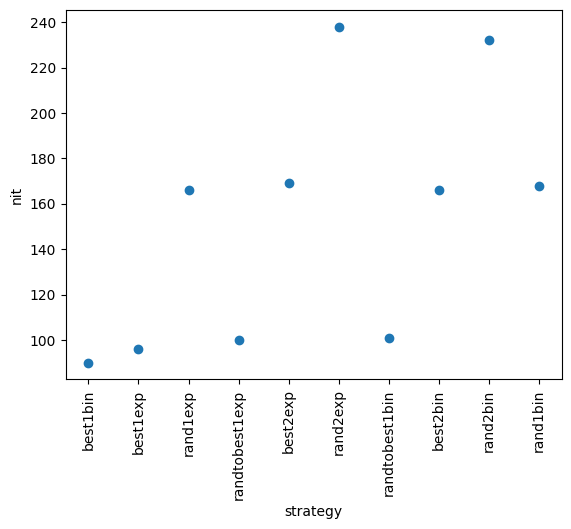

In [5]:
plt.scatter(strategies_dict.keys(), strategies_dict.values())
plt.xticks(rotation=90)
plt.xlabel('strategy')
plt.ylabel('nit')
plt.show()

У стратегии по умолчанию (best1bin) наименьшие количество итераций и количество обращений к функции.


### popsize

In [6]:
popsizes_dict = {}

for i in range(0, 21, 5):
  res = differential_evolution(ackley, bounds, seed=42, popsize=i)
  popsizes_dict[i] = res.nit
  print(f'popsize: {i}\n{res}\n')

popsize: 0
 message: Optimization terminated successfully.
 success: True
     fun: 2.579927557029905
       x: [-2.630e-08  9.522e-01]
     nit: 7
    nfev: 103
     jac: [-1.421e-06 -1.066e-06]

popsize: 5
 message: Optimization terminated successfully.
 success: True
     fun: 4.440892098500626e-16
       x: [ 0.000e+00  0.000e+00]
     nit: 100
    nfev: 1073

popsize: 10
 message: Optimization terminated successfully.
 success: True
     fun: 4.440892098500626e-16
       x: [ 0.000e+00  0.000e+00]
     nit: 97
    nfev: 2023

popsize: 15
 message: Optimization terminated successfully.
 success: True
     fun: 4.440892098500626e-16
       x: [ 0.000e+00  0.000e+00]
     nit: 90
    nfev: 2793

popsize: 20
 message: Optimization terminated successfully.
 success: True
     fun: 4.440892098500626e-16
       x: [ 0.000e+00  0.000e+00]
     nit: 95
    nfev: 3903



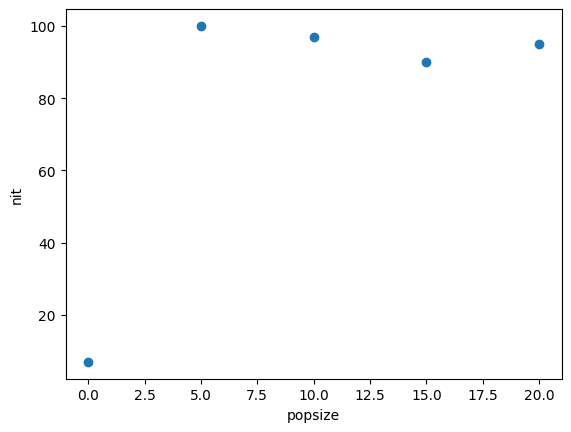

In [7]:
plt.scatter(popsizes_dict.keys(), popsizes_dict.values())
plt.xlabel('popsize')
plt.ylabel('nit')
plt.show()

popsize = 0 показывает некорректное решение.

При повышении popsize увеличиваeтся количество обращений к функции.

Использование значения по умолчанию (popsize = 15) показывает наименьшие количество итераций и количество обращений к функции.


### mutation

In [8]:
mutations_dict = {}
mutations_list = [0., 0.5, 1. , 1.5, 1.9]

for i in mutations_list[:-1]:
  for j in mutations_list[mutations_list.index(i)+1:]:
    res = differential_evolution(ackley, bounds, seed=42, mutation=(i, j))
    mutations_dict[f'({i}, {j})'] = res.nit
    print(f'mutation: {i} - {j}\n{res}\n')

mutation: 0.0 - 0.5
 message: Optimization terminated successfully.
 success: True
     fun: 3.5744518772577867
       x: [ 9.685e-01 -9.685e-01]
     nit: 4
    nfev: 162
     jac: [ 3.553e-07  3.553e-06]

mutation: 0.0 - 1.0
 message: Optimization terminated successfully.
 success: True
     fun: 4.440892098500626e-16
       x: [ 0.000e+00  0.000e+00]
     nit: 50
    nfev: 1593

mutation: 0.0 - 1.5
 message: Optimization terminated successfully.
 success: True
     fun: 4.440892098500626e-16
       x: [ 0.000e+00  0.000e+00]
     nit: 65
    nfev: 2043

mutation: 0.0 - 1.9
 message: Optimization terminated successfully.
 success: True
     fun: 4.440892098500626e-16
       x: [ 0.000e+00  0.000e+00]
     nit: 74
    nfev: 2313

mutation: 0.5 - 1.0
 message: Optimization terminated successfully.
 success: True
     fun: 4.440892098500626e-16
       x: [ 0.000e+00  0.000e+00]
     nit: 90
    nfev: 2793

mutation: 0.5 - 1.5
 message: Optimization terminated successfully.
 success: Tru

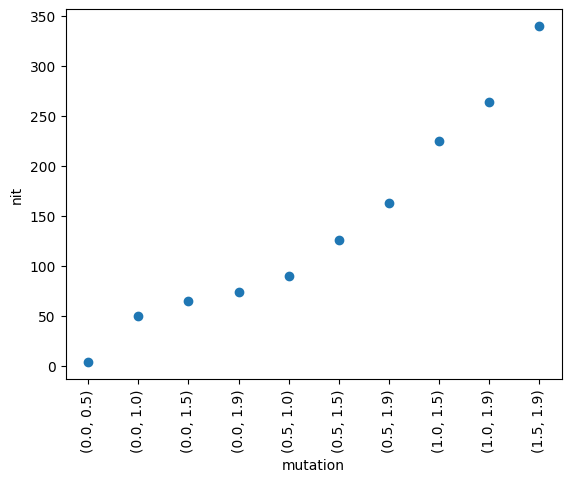

In [9]:
plt.scatter(mutations_dict.keys(), mutations_dict.values())
plt.xticks(rotation=90)
plt.xlabel('mutation')
plt.ylabel('nit')
plt.show()

In [10]:
mutations_dict = {}

for i in mutations_list:
  res = differential_evolution(ackley, bounds, seed=42, mutation=i)
  mutations_dict[i] = res.nit
  print(f'mutation: {i}\n{res}\n')

mutation: 0.0
 message: Optimization terminated successfully.
 success: True
     fun: 3.5744518772578506
       x: [ 9.685e-01 -9.685e-01]
     nit: 3
    nfev: 156
     jac: [-1.066e-06  3.908e-06]

mutation: 0.5
 message: Optimization terminated successfully.
 success: True
     fun: 4.440892098500626e-16
       x: [ 0.000e+00  0.000e+00]
     nit: 57
    nfev: 1803

mutation: 1.0
 message: Optimization terminated successfully.
 success: True
     fun: 1.283417816466681e-13
       x: [ 4.441e-14  8.882e-15]
     nit: 138
    nfev: 4233

mutation: 1.5
 message: Optimization terminated successfully.
 success: True
     fun: 4.440892098500626e-16
       x: [ 0.000e+00  0.000e+00]
     nit: 318
    nfev: 9633

mutation: 1.9
 message: Optimization terminated successfully.
 success: True
     fun: 1.8802102097481566e-09
       x: [-6.648e-10 -2.236e-12]
     nit: 246
    nfev: 7473



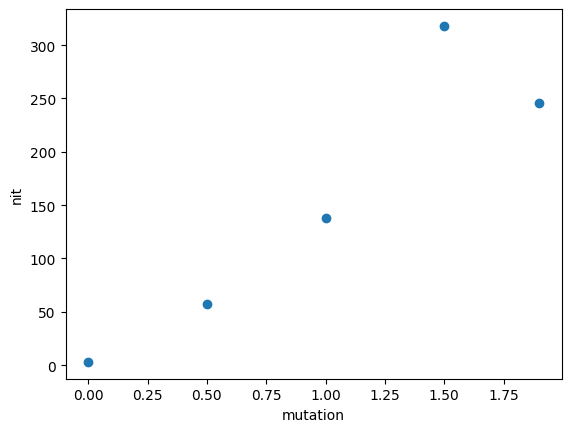

In [11]:
plt.scatter(mutations_dict.keys(), mutations_dict.values())
plt.xlabel('mutation')
plt.ylabel('nit')
plt.show()

В случае параметра mutation наименьшие количество итераций и количество обращений к функции показали значения mutation = 0.5 и mutation = (0.0, 1.0).

In [12]:
# mutation = 0.5

differential_evolution(ackley, bounds, seed=42, mutation=0.5)

 message: Optimization terminated successfully.
 success: True
     fun: 4.440892098500626e-16
       x: [ 0.000e+00  0.000e+00]
     nit: 57
    nfev: 1803

In [13]:
# mutation = (0.0, 1.0)

differential_evolution(ackley, bounds, seed=42, mutation=(0.0, 1.0))

 message: Optimization terminated successfully.
 success: True
     fun: 4.440892098500626e-16
       x: [ 0.000e+00  0.000e+00]
     nit: 50
    nfev: 1593

In [14]:
# mutation=(0.5, 1) - значение по умолчанию

differential_evolution(ackley, bounds, seed=42, mutation=(0.5, 1))

 message: Optimization terminated successfully.
 success: True
     fun: 4.440892098500626e-16
       x: [ 0.000e+00  0.000e+00]
     nit: 90
    nfev: 2793

## Дополнительное задание


Поэкспериментируйте с параметрами и оптимизацией через [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html):

In [70]:
from scipy.optimize import minimize
from scipy import optimize

x0 = [0,0]

result_m = minimize(ackley, x0,  method='Nelder-Mead')
result_m

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 4.440892098500626e-16
             x: [ 0.000e+00  0.000e+00]
           nit: 8
          nfev: 17
 final_simplex: (array([[ 0.000e+00,  0.000e+00],
                       [-1.607e-05, -8.453e-06],
                       [-1.404e-06, -3.113e-05]]), array([ 4.441e-16,  5.136e-05,  8.816e-05]))

Вы также можете поэкспериментировать с [другими методами оптимизации](https://habr.com/ru/company/prequel/blog/568496/), но это не обязательно для зачета.


### method

In [80]:
result_m = minimize(ackley, x0,  method='COBYLA')
result_m

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: 0.00028310899612238316
       x: [-8.763e-06  9.962e-05]
    nfev: 25
   maxcv: 0.0

In [81]:
result_m = minimize(ackley, x0,  method='SLSQP', jac=optimize.rosen_der)
result_m

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 3.7056861801332275e-07
       x: [ 1.310e-07  0.000e+00]
     nit: 1
     jac: [-2.000e+00  0.000e+00]
    nfev: 12
    njev: 1

Метод SLSQP показывает наименьшие количество итераций (+ количество обращений к функции и количество обращений к jac), но при этом значение х = [0.000000131, 0.0].

Метод COBYLA показывает небольшое количество обращений к функции, но в результате также х получается не [0, 0].

Оптимизация для остальных методов либо завершаются неуспешно, либо показывает большее количество итераций.